* https://re-thought.com/pandas-value_counts/

In [1]:
import pandas as pd
pd.to_datetime('2020-09-21 2:30pm')

Timestamp('2020-09-21 14:30:00')

In [67]:
pd.options.display.max_rows = 150

In [2]:
# In pandas, a single point in time is represented as a Timestamp. 
pd.to_datetime('09/21/2020')

Timestamp('2020-09-21 00:00:00')

In [9]:
type(pd.to_datetime('09/01/2020', dayfirst = True))

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# If we supply a list or array of strings as input to to_datetime(), 
# it returns a sequence of date/time values in a DatetimeIndex object, 
# which is the core data structure that powers much of pandas time series functionality.
pd.to_datetime(['2018-05-05', '7/1/1997', 'Mar 31, 1995'])

DatetimeIndex(['2018-05-05', '1997-07-01', '1995-03-31'], dtype='datetime64[ns]', freq=None)

In [ ]:
# The data type datetime64[ns] indicates that the underlying data is stored as 64-bit 
# integers, in units of nanoseconds (ns). This data structure allows pandas to 
# compactly store large sequences of date/time values and efficiently perform 
# vectorized operations using NumPy datetime64 arrays

In [10]:
# If we’re dealing with a sequence of strings all in the same date/time format, 
# we can explicitly specify it with the format parameter. 

# We use the format codes %m (numeric month), %d (day of month), and 
# %y (2-digit year) to specify the format.
pd.to_datetime(['12/25/19', '8/23/17', '12/15/12'], format='%m/%d/%y')


DatetimeIndex(['2019-12-25', '2017-08-23', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## Open Power Systems Data

In this tutorial, we’ll be working with daily time series of Open Power System Data (OPSD) for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017.

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

* Date — The date (yyyy-mm-dd format)
* Consumption — Electricity consumption in GWh
* Wind — Wind power production in GWh
* Solar — Solar power production in GWh
* Wind+Solar — Sum of wind and solar power production in GWh

We will explore how electricity consumption and production in Germany have varied over time, using pandas time series tools to answer questions such as:

* When is electricity consumption typically highest and lowest?
* How do wind and solar power production vary with seasons of the year?
* What are the long-term trends in electricity consumption, solar power, and wind power?
* How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [15]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.shape

(4383, 4)

In [91]:
opsd_daily.loc['2012-01', 'Consumption']

1269.5810000000001

In [17]:
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [18]:
# Add columns with year, month, and weekday name
# opsd_daily['Year'] = opsd_daily.index.year
# opsd_daily['Month'] = opsd_daily.index.month
# opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [19]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Name: 2017-08-10 00:00:00, dtype: float64

In [22]:
opsd_daily.loc['2017'].resample('M').ohlc()

Consumption                                         Wind           \
                  open        high         low       close     open     high   
Date                                                                           
2017-01-31  1130.41300  1682.00200  1130.41300  1620.86000  307.125  686.578   
2017-02-28  1627.96500  1637.74000  1208.72500  1532.53600  221.296  826.278   
2017-03-31  1551.41000  1565.24500  1126.86900  1402.58500  463.541  666.659   
2017-04-30  1186.05600  1488.59100  1048.70700  1091.06300   82.512  561.129   
2017-05-31  1103.22500  1487.17600  1070.71100  1437.94400  440.713  440.713   
2017-06-30  1407.46100  1459.28900  1016.02400  1383.97900   88.558  669.219   
2017-07-31  1160.76200  1412.27600  1046.12800  1333.13000  326.425  353.673   
2017-08-31  1364.81900  1434.05200  1024.32400  1417.97368  100.080  455.379   
2017-09-30  1361.78735  1460.61621  1057.50932  1216.86135   34.233  761.751   
2017-10-31  1106.68587  1508.51484  1106.68587  1204.08577  218.240  819.818   
2017-11-30  1309.18478  1617.03309  1193.85495  1617.03309  420.446  743.280   
2017-12-31  1592.96187  1651.90418  1107.11488  1107.11488   52.323  812.422   

                               Solar           ... Wind+Solar           Year  \
               low    close     open     high  ...        low    close  open   
Date                                           ...                             
2017-01-31  31.375  124.784   35.291   68.625  ...     41.675  136.848  2017   
2017-02-28  98.879  602.224   23.817  113.905  ...    164.548  651.332  2017   
2017-03-31  71.216  260.808   55.172  191.843  ...    140.322  430.657  2017   
2017-04-30  40.669  435.487  144.801  231.643  ...    158.783  667.130  2017   
2017-05-31  55.642  304.100  119.738  241.580  ...    212.773  501.319  2017   
2017-06-30  31.187  379.310  224.984  237.841  ...    248.962  529.684  2017   
2017-07-31  33.863  125.196  109.991  217.346  ...    181.514  308.503  2017   
2017-08-31  45.224  208.497  159.889  216.117  ...    150.775  279.291  2017   
2017-09-30  16.478  198.308   83.407  168.123  ...    117.640  289.374  2017   
2017-10-31  64.256  256.960   87.194  123.715  ...    162.756  313.727  2017   
2017-11-30  62.667   66.389   37.046   57.358  ...     80.703   80.703  2017   
2017-12-31  52.323  721.176   19.266   42.994  ...     71.589  741.156  2017   

                             Month                 
            high   low close  open high low close  
Date                                               
2017-01-31  2017  2017  2017     1    1   1     1  
2017-02-28  2017  2017  2017     2    2   2     2  
2017-03-31  2017  2017  2017     3    3   3     3  
2017-04-30  2017  2017  2017     4    4   4     4  
2017-05-31  2017  2017  2017     5    5   5     5  
2017-06-30  2017  2017  2017     6    6   6     6  
2017-07-31  2017  2017  2017     7    7   7     7  
2017-08-31  2017  2017  2017     8    8   8     8  
2017-09-30  2017  2017  2017     9    9   9     9  
2017-10-31  2017  2017  2017    10   10  10    10  
2017-11-30  2017  2017  2017    11   11  11    11  
2017-12-31  2017  2017  2017    12   12  12    12  

[12 rows x 24 columns]

In [25]:
opsd_monthly = opsd_daily[['Consumption', 'Wind', 'Solar']].resample('M').sum(min_count = 28)

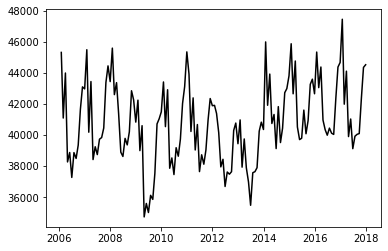

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color = 'black', label = 'Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax = ax, linewidth = 0)
ax.xaxis.set_major_locator(

### Rolling windows

Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc.

Let’s use the rolling() method to compute the 7-day rolling mean of our daily data. We use the center=True argument to label each window at its midpoint

In [34]:
cities = pd.read_html('wikipedia_data.html')[1]
cities=cities.iloc[:-1,[0,3,5,6,7,8]]

In [40]:
cities.explode('NFL')

,Metropolitan area,Population (2016 est.)[8],NFL,MLB,NBA,NHL
0,New York City,20153634,GiantsJets[note 1],YankeesMets[note 2],KnicksNets,RangersIslandersDevils[note 3]
1,Los Angeles,13310447,RamsChargers[note 4],DodgersAngels,LakersClippers,KingsDucks
2,San Francisco Bay Area,6657982,49ersRaiders[note 6],GiantsAthletics,Warriors,Sharks[note 7]
3,Chicago,9512999,Bears[note 8],CubsWhite Sox,Bulls[note 9],Blackhawks
4,Dallas–Fort Worth,7233323,Cowboys,Rangers,Mavericks,Stars
5,"Washington, D.C.",6131977,Redskins,Nationals[note 10],Wizards[note 11],Capitals
6,Philadelphia,6070500,Eagles,Phillies[note 12],76ers,Flyers[note 13]
7,Boston,4794447,Patriots[note 14],Red Sox[note 15],Celtics,Bruins
8,Minneapolis–Saint Paul,3551036,Vikings,Twins,Timberwolves,Wild[note 16]
9,Denver,2853077,Broncos,Rockies,Nuggets[note 17],Avalanche[note 18]


In [38]:
orchestra_dict = {'City': ['Los Angeles Philharmonic',
                          'Chicago Symphony Orchestra',
                          'San Francisco Symphony Orchestra',
                          'Boston Symphony Orchestra',
                          'New York Philharmonic',
                          'National Symphony Orchestra',
                          'Philadelphia Orchestra',
                          'Cleveland Orchestra',
                          'Pittsburgh Symphony Orchestra',
                          'Cincinnati Symphony Orchestra'],
                 
                 
                 'Base_Pay_2015': [153400, 151320, 150454,
                             142896, 141113, 136136,
                             128700, 127504, 107117,103500]}


orchestra = pd.DataFrame.from_dict(orchestra_dict)

## Time comparison

%%timeit module

In [43]:
import numpy as np
xarray = np.random.rand(1000, 10)
xlist = xarray.tolist()
xdf = pd.DataFrame(xarray)

In [47]:
def some_calc1(x):
    if x > 0.1:
        return 1
    elif x > 0.01:
        return 10 * x
    elif x > 0:
        return 2 * x + 0.03
    else:
        return 0
    
def some_calc2(x):
    return (x > 0.1) * 1 + \
            ((x > 0.01) & (x <= 0.04)) * x * 10.0 + \
            ((x > 0) & (x <= 0.01)) * (x * 2 + 0.03) + \
            0.0

In [48]:
@np.vectorize
def some_calcs1_vec(x):
    if x > 0.1:
        return 1
    elif x > 0.01:
        return 10 * x
    elif x > 0:
        return 2 * x + 0.03
    else:
        return 0

In [53]:
%timeit array1 = some_calcs1_vec(xarray)
%timeit array2 = some_calc2(xarray)

2.81 ms ± 94.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
226 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
%timeit z1 = some_calcs1_vec(xdf)
%timeit z2 = some_calc2(xdf)

2.2 ms ± 56.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.2 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
# The applymap() function is used to apply a function to a Dataframe elementwise.
# This method applies a function that accepts and returns a scalar to every element 
# of a DataFrame.

# DataFrame.applymap(self, func)
%timeit df1 = xdf.applymap(some_calc1)
%timeit df2 = xdf.applymap(some_calc2)

43.9 ms ± 8.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
57.8 ms ± 7.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%timeit z1 = xdf.apply(some_calcs1_vec, axis = 0)
#%timeit z2 = xdf.apply(some_calc2, axis = 0)
%timeit z3 = xdf.apply(some_calcs1_vec, axis = 1)
#%timeit z4 = xdf.apply(some_calc2, axis = 1)

6.4 ms ± 500 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
219 ms ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
xdf.applymap(lambda x: len(str(x)))

,0,1,2,3,4,5,6,7,8,9
0,18,19,18,19,18,18,18,18,19,19
1,18,18,19,18,21,19,18,18,18,18
2,18,18,19,18,20,19,19,18,18,19
3,19,19,18,19,18,17,19,18,18,18
4,19,18,19,18,19,18,18,18,19,19
...,...,...,...,...,...,...,...,...,...,...
995,19,18,18,19,19,18,18,18,18,19
996,19,18,19,20,18,19,18,18,19,18
997,18,19,19,19,17,19,18,18,19,17
998,20,18,19,18,19,19,20,18,18,18


In [62]:
import numpy as np
import csv

def sigmoid(x):
    return 1.0/(1+np.exp(-x)) 

def cost(x,y,th):
    pro = sigmoid(np.dot(x,th))
    result = sum(-y * np.log(pro) - (1-y) * np.log(1-pro))   
    result = result/len(x) #len: number of feature rows
    return result

def gradient(x,y,th):
    xTrans = x.transpose()                                      
    sig = sigmoid(np.dot(x,th))                              
    grad = np.dot(xTrans, ( sig - y ))                          
    grad = grad / len(x) #len: number of feature rows  
    return grad
def hessian(x,y,th):
    xTrans = x.transpose()                                      
    sig = sigmoid(np.dot(x,th))                              
    result = (1.0/len(x) * np.dot(xTrans, x) * np.diag(sig) * np.diag(1 - sig) )   
    return result
def updateTh(x,y,th):
    hessianInv = np.linalg.inv(hessian(x,y,th))                         
    grad = gradient(x,y,th)                                  
    th = th - np.dot(hessianInv, grad)                     
    return th

m = 80 #number of x rows
x = np.ones([m,3])
y = np.empty([m,1], dtype = int)
th = np.zeros([3,1])
hessianResult = np.identity(3) #identity 3x3


In [63]:
hessianResult

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
def hessian(self, X, Y, ld):
    xTrans = x.transpose()
    sig = sigmoid(np.dot(x, self.theta))

In [68]:
def mklbl(prefix, n):
    return ["%s%s" % (prefix, i) for i in range(n)]


miindex = pd.MultiIndex.from_product([mklbl('A', 4),
                                       mklbl('B', 2),
                                       mklbl('C', 4),
                                       mklbl('D', 2)])
 

micolumns = pd.MultiIndex.from_tuples([('a', 'foo'), ('a', 'bar'),
                                        ('b', 'foo'), ('b', 'bah')],
                                      names=['lvl0', 'lvl1'])

dfmi = pd.DataFrame(np.arange(len(miindex) * len(micolumns))
                     .reshape((len(miindex), len(micolumns))),
                     index=miindex,
                     columns=micolumns).sort_index().sort_index(axis=1)

dfmi

lvl0           a         b     
lvl1         bar  foo  bah  foo
A0 B0 C0 D0    1    0    3    2
         D1    5    4    7    6
      C1 D0    9    8   11   10
         D1   13   12   15   14
      C2 D0   17   16   19   18
         D1   21   20   23   22
      C3 D0   25   24   27   26
         D1   29   28   31   30
   B1 C0 D0   33   32   35   34
         D1   37   36   39   38
      C1 D0   41   40   43   42
         D1   45   44   47   46
      C2 D0   49   48   51   50
         D1   53   52   55   54
      C3 D0   57   56   59   58
         D1   61   60   63   62
A1 B0 C0 D0   65   64   67   66
         D1   69   68   71   70
      C1 D0   73   72   75   74
         D1   77   76   79   78
      C2 D0   81   80   83   82
         D1   85   84   87   86
      C3 D0   89   88   91   90
         D1   93   92   95   94
   B1 C0 D0   97   96   99   98
         D1  101  100  103  102
      C1 D0  105  104  107  106
         D1  109  108  111  110
      C2 D0  113  112  115  114
         D1  117  116  119  118
      C3 D0  121  120  123  122
         D1  125  124  127  126
A2 B0 C0 D0  129  128  131  130
         D1  133  132  135  134
      C1 D0  137  136  139  138
         D1  141  140  143  142
      C2 D0  145  144  147  146
         D1  149  148  151  150
      C3 D0  153  152  155  154
         D1  157  156  159  158
   B1 C0 D0  161  160  163  162
         D1  165  164  167  166
      C1 D0  169  168  171  170
         D1  173  172  175  174
      C2 D0  177  176  179  178
         D1  181  180  183  182
      C3 D0  185  184  187  186
         D1  189  188  191  190
A3 B0 C0 D0  193  192  195  194
         D1  197  196  199  198
      C1 D0  201  200  203  202
         D1  205  204  207  206
      C2 D0  209  208  211  210
         D1  213  212  215  214
      C3 D0  217  216  219  218
         D1  221  220  223  222
   B1 C0 D0  225  224  227  226
         D1  229  228  231  230
      C1 D0  233  232  235  234
         D1  237  236  239  238
      C2 D0  241  240  243  242
         D1  245  244  247  246
      C3 D0  249  248  251  250
         D1  253  252  255  254

In [86]:
dfmi.unstack(level = 0).unstack(level = 0).unstack(level = 0)

lvl0   a                                      ...    b                      \
lvl1 bar                                      ...  foo                       
      A0                              A1      ...   A2        A3             
      B0              B1              B0      ...   B1        B0             
      C0  C1  C2  C3  C0  C1  C2  C3  C0  C1  ...   C2   C3   C0   C1   C2   
D0     1   9  17  25  33  41  49  57  65  73  ...  178  186  194  202  210   
D1     5  13  21  29  37  45  53  61  69  77  ...  182  190  198  206  214   

lvl0                           
lvl1                           
                               
            B1                 
       C3   C0   C1   C2   C3  
D0    218  226  234  242  250  
D1    222  230  238  246  254  

[2 rows x 128 columns]

In [100]:
# df.update()
df = pd.DataFrame({'A': ['a', 'b', 'c'],
                   'B': ['x', 'y', 'z']})
#new_df = pd.DataFrame({'B': ['d', 'e', 'f', 'g', 'h', 'i']})
new_df = pd.DataFrame({'B':[100, np.nan, 6, 6]})

In [101]:
df.update(new_df)

In [96]:
new_column = pd.Series(['d', 'e'], name = 'B', index = [0, 2])
new_column

0    d
2    e
Name: B, dtype: object

In [98]:
df.update(new_column)

In [105]:
# df.value_counts()
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                   'num_wings': [2, 0, 0, 0]},
                  index=['falcon', 'dog', 'cat', 'ant'])

In [111]:
df['num_legs'].value_counts(ascending = True, normalize = True)

2    0.25
6    0.25
4    0.50
Name: num_legs, dtype: float64

In [123]:
import random
import string
pd.DataFrame({'char': [''.join(random.choice(string.ascii_lowercase)) for i in range(10)],
             'char2': [''.join(random.choice(string.ascii_lowercase)) for i in range(10)]})

,char,char2
0,b,v
1,n,e
2,r,j
3,g,j
4,i,f
5,l,v
6,v,w
7,e,n
8,r,a
9,v,j


In [121]:
[''.join(random.choice(string.ascii_lowercase)) for i in range(10)]

['q', 'e', 'h', 'a', 'q', 'a', 'e', 'e', 'j', 'e']